In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#DATASET
df = pd.read_excel('Dataset.xlsx', sheet_name='ARDS Phase 01 fb(T1 & T2)')

In [11]:
# Set the target column
target_column = 'Label'

Label                        1.000000
GCS_T2                       0.224820
pH_T2                        0.191120
LDH_T1                       0.135915
Potassium_T1                 0.133942
pH_T1                        0.130470
P/F Ratio_T2                 0.119285
HC03_T2                      0.102955
ALP_T1                       0.101224
GCS_T1                       0.084552
Sodium_T1                    0.078277
Potassium_T2                 0.076100
WBC_T2                       0.072715
Ejection fraction_T1         0.064170
Pa02_T2                      0.063869
Hb_T1                        0.038542
ALT_T1                       0.027267
AST_T1                       0.023208
Creatinine_T1                0.003704
P/F Ratio_T1                 0.001873
Hb_T2                       -0.001477
Causes of ARDS_T1           -0.001672
PT_T1                       -0.006743
PEEP_T2                     -0.015314
Sp02_T1                     -0.017563
Sp02_T2                     -0.030908
PEEP_T1     

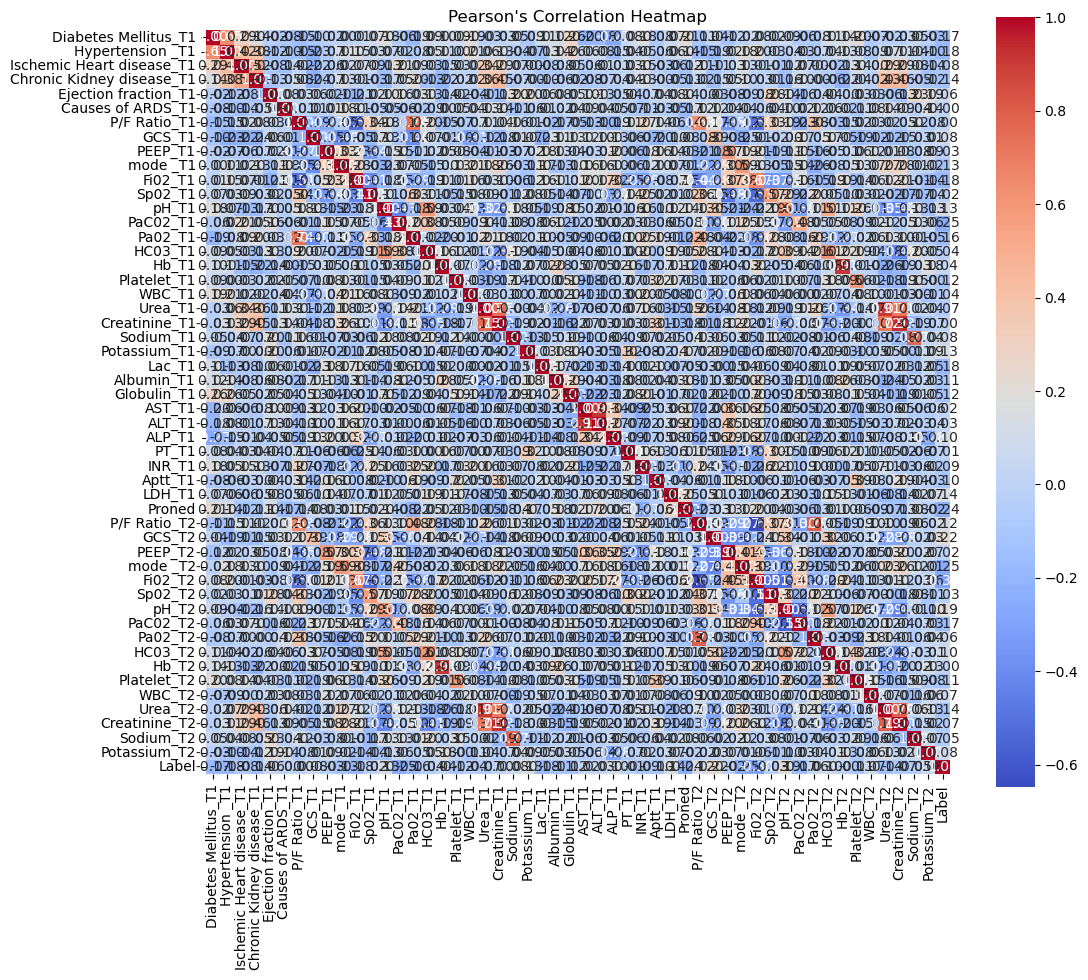

In [27]:
# Select only numeric columns
df = df.select_dtypes(include=['number'])

# Calculate Pearson's correlation coefficient for each variable with 'Label'
corr_matrix = df.corr()

print(corr_matrix['Label'].sort_values(ascending=False))

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Pearson's Correlation Heatmap")
plt.show()

In [29]:
#MUTUAL INFORMATION SCORES
x = df.drop(columns=[target_column])
y = df[target_column]
mi_scores = mutual_info_regression(x, y, random_state=18)
mi_scores = pd.Series(mi_scores, index=x.columns)

print(mi_scores.sort_values(ascending=False))

Causes of ARDS_T1            0.180752
Creatinine_T2                0.142343
Potassium_T2                 0.131376
PEEP_T1                      0.113078
Ischemic Heart disease_T1    0.077604
Fi02_T2                      0.073659
pH_T2                        0.071734
Creatinine_T1                0.069736
mode _T2                     0.069622
WBC_T1                       0.063376
Sp02_T1                      0.062384
HC03_T2                      0.059684
P/F Ratio_T1                 0.048841
Fi02_T1                      0.043364
GCS_T2                       0.043355
ALP_T1                       0.043327
Pa02_T1                      0.028481
HC03_T1                      0.024803
LDH_T1                       0.023394
Hb_T2                        0.022062
Hb_T1                        0.019087
Sodium_T1                    0.010413
Urea_T2                      0.009284
pH_T1                        0.006444
Urea_T1                      0.003508
PaC02_T1                     0.002563
PEEP_T2     

In [31]:
#ANOVA F-test
f_statistic, p_values = f_classif(x, y)
anova_scores = pd.DataFrame({'Feature': x.columns, 'F-score': f_statistic, 'p-value': p_values})
anova_scores = anova_scores.sort_values('p-value', ascending=True)

print(anova_scores)

                      Feature   F-score   p-value
38                    Fi02_T2  9.065557  0.003353
37                   mode _T2  6.418511  0.012967
13                   PaC02_T1  6.354769  0.013409
33                     Proned  5.798218  0.018016
35                     GCS_T2  4.950828  0.028496
40                      pH_T2  3.525799  0.063555
10                    Fi02_T1  3.239408  0.075129
23                     Lac_T1  3.221540  0.075924
1            Hypertension _T1  3.201492  0.076826
0        Diabetes Mellitus_T1  2.904359  0.091679
41                   PaC02_T2  2.779502  0.098842
14                    Pa02_T1  2.533055  0.114878
47                    Urea_T2  1.904212  0.170916
3   Chronic Kidney disease_T1  1.830856  0.179307
32                     LDH_T1  1.750306  0.189082
22               Potassium_T1  1.698954  0.195642
12                      pH_T1  1.610495  0.207589
9                    mode _T1  1.587934  0.210774
25                Globulin_T1  1.435878  0.233852


In [35]:
#Feature selection using p-values
p_value_threshold = 0.05
selected_features_p = anova_scores[anova_scores['p-value'] < p_value_threshold]['Feature'].tolist()

p_list = '\n'.join(f"{i+1}. {item}" for i, item in enumerate(selected_features_p))
print("Features selected based on ANOVA F-test (p-value < 0.05):")
print(p_list)

Features selected based on ANOVA F-test (p-value < 0.05):
1. Fi02_T2
2. mode _T2
3. PaC02_T1
4. Proned
5. GCS_T2


In [37]:
#FEATURE SELECTION USING PEARSON'S COEFFICIENT VALUE 
correlation_threshold=0.2

High_corr_features = corr_matrix[target_column][
        (corr_matrix[target_column] >= correlation_threshold) | 
        (corr_matrix[target_column] <= -correlation_threshold)
    ].index.tolist()
High_corr_features.remove(target_column)

corr_list = '\n'.join(f"{i+1}. {item}" for i, item in enumerate(High_corr_features))
print("Significant features by Correaltion are: ")
print (corr_list)

Significant features by Correaltion are: 
1. PaC02_T1
2. Proned
3. GCS_T2
4. mode _T2
5. Fi02_T2


In [39]:
#FEATURE SELECTION USING MI SCORES

mi_threshold=0.05

High_mi_features = mi_scores[mi_scores >= mi_threshold].index.tolist()

mi_list = '\n'.join(f"{i+1}. {item}" for i, item in enumerate(High_mi_features))
print("Significant features by mutual information are: ")
print(mi_list)

Significant features by mutual information are: 
1. Ischemic Heart disease_T1
2. Causes of ARDS_T1
3. PEEP_T1
4. Sp02_T1
5. WBC_T1
6. Creatinine_T1
7. mode _T2
8. Fi02_T2
9. pH_T2
10. HC03_T2
11. Creatinine_T2
12. Potassium_T2


In [41]:
# Combine features from all methods
all_selected_features = list(set(High_corr_features) & set(High_mi_features) & set(selected_features_p))

In [45]:
# Check for multicollinearity

# Clean data first
df_clean = df[all_selected_features].dropna()

# Compute correlations with minimum observations
corr_matrix = df_clean.corr(method='pearson', min_periods=30).abs()

# Upper triangle extraction
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_tri = corr_matrix.mask(~mask)

# Dynamic thresholding
high_corr = (upper_tri > 0.5).sum()
to_drop = list(high_corr[high_corr > 0].index)

In [47]:
# FINAL FEATURE SET
filtered_features = [feat for feat in all_selected_features if feat not in to_drop]

print("Most significant features are:")
for i, feature in enumerate(filtered_features, 1):
    print(f"{i}. {feature}")

Most significant features are:
1. Fi02_T2
2. mode _T2
